#Introducción a como leer y manipular imagenes medicas de tipo DICOM

El formato DICOM (Digital Imaging and Communications in Medicine), es el estándar internacional para el manejo y la transmisión de imágenes médicas y su información asociada.

##Ventajas del Uso de DICOM para el Almacenamiento de Imágenes Médicas

**Integración Completa**: DICOM facilita la integración de imágenes y datos asociados con sistemas de información hospitalaria (HIS) y sistemas de archivo y comunicación de imágenes (PACS), permitiendo un flujo de trabajo sin interrupciones y un acceso más rápido a la información.

**Uniformidad y Estándar**: Al ser un estándar global, DICOM asegura que las imágenes y la información médica pueden ser compartidas y vistas consistentemente sin problemas de compatibilidad entre diferentes dispositivos y software de diferentes fabricantes.

**Metadata Rica**: Cada archivo incluye metadata extensiva, como información del paciente, tipo de estudio, parámetros de imagen y más.

**Soporte Multimodalidad**: Soporta imágenes de una variedad de modalidades médicas, incluyendo radiografía, ultrasonido, CT, MRI, y medicina nuclear, entre otras.

**Seguridad Mejorada**: Incluye protocolos para la seguridad de la información, tales como opciones de cifrado y autenticación de usuario, lo que es crucial para proteger la privacidad y la seguridad de los datos del paciente.

**Acceso y Recuperación Eficientes**: El formato permite la gestión eficiente de grandes volúmenes de imágenes médicas, facilitando una rápida recuperación y acceso a las mismas, lo que es esencial en entornos de atención médica rápida y en situaciones de emergencia.

**Extensibilidad**: Está diseñado para ser extensible, lo que permite la incorporación de nuevos tipos de imágenes y tecnología sin alterar los sistemas existentes. Esto asegura que el estándar permanezca relevante y útil a medida que evolucionan la tecnología médica y las necesidades clínicas.

##¿Cómo lo leemos?¿Cuál es la diferencia con otros formatos como JPEG, PNG o TIFF?

Dos posibles opciones:


#Pydicom


In [7]:
!pip install pydicom
!pip install python-gdcm
!pip install gdcm
!pip install pylibjpeg[all]

In [8]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##Importo un archivo DICOM

In [11]:
from google.colab import files
#uploaded = files.upload()  # Se abrirá una ventana para seleccionar uno o varios archivos

ds = pydicom.dcmread('000000.dcm')
ds

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 196
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055
(0008,0020) Study Date    

Un archivo DICOM contiene muchos datos útiles relacionados con el paciente, la modalidad de imágenes y otros.

##¿Cómo esta estructurado un archivo DICOM?

Estos datos se encuentran almacenados como un diccionario, por lo tanto poseen keys y sus respectivos values.
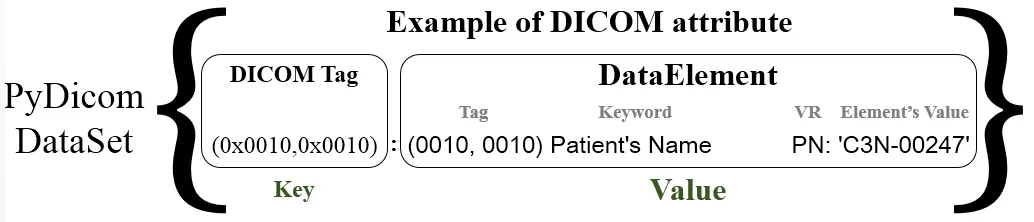

Key: esta representada por dos valores hexagecimales, el primero representa a un grupo y el segundo a un elemento en particular.
Dentro del Value; tenemos 3 elementos:

*   Tag
*   Keyword: Describe al atributo al que se refiere
*   VR: que es el valor del elemento. Puede ser tanto un valor numerico, un numero, una secuencia o una lista.

Vamos a acceder a estos valores:

In [12]:
#Puedo acceder al nombre pidiendo dicho valor
patient_name = ds.PatientName
patient_name

'C3N-00247'

In [13]:
#Podemos pedir el Value usando el DICOM tag para el valor (0010, 0010)
ds[0x0010, 0x0010]

(0010,0010) Patient's Name                      PN: 'C3N-00247'

In [14]:
#Clarificando .value nos devuelve el contenido de VR y no las 3 componentes del Value
ds[0x0010, 0x0010].value

'C3N-00247'

In [15]:
#Devuelve el elemento keyword
ds[0x0010, 0x0010].keyword

'PatientName'

In [16]:
#Devuelve el nombre del diccionario para el elemento
ds[0x0010, 0x0010].name

"Patient's Name"

In [17]:
#Devuelve como esta representando el elemento
ds[0x0010, 0x0010].VR

'PN'

##Ver toda la metadata
Hasta ahora vimos las formas de ver de a un valor a la vez,

In [18]:
ds.keys()

dict_keys([(0008,0005), (0008,0008), (0008,0016), (0008,0018), (0008,0020), (0008,0021), (0008,0022), (0008,0023), (0008,0030), (0008,0031), (0008,0032), (0008,0033), (0008,0050), (0008,0060), (0008,0070), (0008,0090), (0008,1030), (0008,103E), (0008,1090), (0008,1110), (0008,1140), (0008,2112), (0009,0010), (0010,0010), (0010,0020), (0010,0030), (0010,0040), (0010,1010), (0010,2160), (0012,0050), (0012,0051), (0012,0062), (0012,0063), (0012,0064), (0013,0010), (0013,1010), (0013,1013), (0018,0015), (0018,0050), (0018,0060), (0018,0090), (0018,1020), (0018,1030), (0018,1100), (0018,1110), (0018,1111), (0018,1120), (0018,1130), (0018,1140), (0018,1150), (0018,1151), (0018,1152), (0018,1160), (0018,1170), (0018,1190), (0018,1200), (0018,1201), (0018,1210), (0018,5100), (0018,9306), (0018,9307), (0018,9309), (0018,9310), (0018,9311), (0018,9323), (0018,9324), (0018,9345), (0019,0010), (0019,10B0), (0020,000D), (0020,000E), (0020,0010), (0020,0011), (0020,0012), (0020,0013), (0020,0032), (

In [19]:
ds.values()

dict_values([(0008,0005) Specific Character Set              CS: 'ISO_IR 100', (0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'], (0008,0016) SOP Class UID                       UI: CT Image Storage, (0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055, (0008,0020) Study Date                          DA: '20100227', (0008,0021) Series Date                         DA: '20100227', (0008,0022) Acquisition Date                    DA: '20100227', (0008,0023) Content Date                        DA: '20100227', (0008,0030) Study Time                          TM: '161937.171', (0008,0031) Series Time                         TM: '162536.14', (0008,0032) Acquisition Time                    TM: '162203.028699', (0008,0033) Content Time                        TM: '162203.028699', (0008,0050) Accession Number                    SH: '1598252606449858', (0008,0060) Modality               

In [20]:
[*ds.elements()]

[(0008,0005) Specific Character Set              CS: 'ISO_IR 100',
 (0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'],
 (0008,0016) SOP Class UID                       UI: CT Image Storage,
 (0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055,
 (0008,0020) Study Date                          DA: '20100227',
 (0008,0021) Series Date                         DA: '20100227',
 (0008,0022) Acquisition Date                    DA: '20100227',
 (0008,0023) Content Date                        DA: '20100227',
 (0008,0030) Study Time                          TM: '161937.171',
 (0008,0031) Series Time                         TM: '162536.14',
 (0008,0032) Acquisition Time                    TM: '162203.028699',
 (0008,0033) Content Time                        TM: '162203.028699',
 (0008,0050) Accession Number                    SH: '1598252606449858',
 (0008,0060) Modality              

In [21]:
ds.group_dataset(0x0028)

(0028,0002) Samples per Pixel                   US: 1
(0028,0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028,0010) Rows                                US: 512
(0028,0011) Columns                             US: 512
(0028,0030) Pixel Spacing                       DS: [0.564453125, 0.564453125]
(0028,0100) Bits Allocated                      US: 16
(0028,0101) Bits Stored                         US: 12
(0028,0102) High Bit                            US: 11
(0028,0103) Pixel Representation                US: 0
(0028,0106) Smallest Image Pixel Value          US: 0
(0028,0107) Largest Image Pixel Value           US: 4095
(0028,0303) Longitudinal Temporal Information M CS: 'MODIFIED'
(0028,1050) Window Center                       DS: [-500, 40]
(0028,1051) Window Width                        DS: [1500, 400]
(0028,1052) Rescale Intercept                   DS: '-1024'
(0028,1053) Rescale Slope                       DS: '1'
(0028,1055) Window Center & Width Explanation   LO: [

In [22]:
ds.dir() #Nos devuelve las keywords en orden alfabetico

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionNumber',
 'AcquisitionTime',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'CTDIvol',
 'ClinicalTrialTimePointDescription',
 'ClinicalTrialTimePointID',
 'Columns',
 'ContentDate',
 'ContentTime',
 'ConvolutionKernel',
 'DataCollectionDiameter',
 'DateOfLastCalibration',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'EstimatedDoseSaving',
 'EthnicGroup',
 'Exposure',
 'ExposureModulationType',
 'ExposureTime',
 'FilterType',
 'FocalSpots',
 'FrameOfReferenceUID',
 'GantryDetectorTilt',
 'GeneratorPower',
 'HighBit',
 'ImageComments',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'InstanceNumber',
 'KVP',
 'LargestImagePixelValue',
 'LongitudinalTemporalInformationModified',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientIdentityRemoved',
 'PatientName',
 'Pati

In [23]:
#Nos devuelve todos los atributos que tengan la palabra pixel como parte de la keyword
ds.dir('Pixel')

['LargestImagePixelValue',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'SamplesPerPixel',
 'SmallestImagePixelValue']

In [24]:
#Buscamos los elementos que tengan 'Sequence' en su keyword
ds.dir('Sequence')

['DeidentificationMethodCodeSequence',
 'ReferencedImageSequence',
 'ReferencedStudySequence',
 'SourceImageSequence']

In [25]:
#Intentemos ver los elementos dentro de una de estas secuencias
print(ds.ReferencedImageSequence[:])
print("---------------------------")
print(ds.DeidentificationMethodCodeSequence[:])

[(0008,1150) Referenced SOP Class UID            UI: CT Image Storage
(0008,1155) Referenced SOP Instance UID         UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.205235983215257790411718232367]
---------------------------
[(0008,0100) Code Value                          SH: '113100'
(0008,0102) Coding Scheme Designator            SH: 'DCM'
(0008,0104) Code Meaning                        LO: 'Basic Application Confidentiality Profile', (0008,0100) Code Value                          SH: '113101'
(0008,0102) Coding Scheme Designator            SH: 'DCM'
(0008,0104) Code Meaning                        LO: 'Clean Pixel Data Option', (0008,0100) Code Value                          SH: '113104'
(0008,0102) Coding Scheme Designator            SH: 'DCM'
(0008,0104) Code Meaning                        LO: 'Clean Structured Content Option', (0008,0100) Code Value                          SH: '113105'
(0008,0102) Coding Scheme Designator            SH: 'DCM'
(0008,0104) Code Meaning                    

In [26]:
#Para pedir que nos devuelva un determinado valor de la secuencia
print(ds.DeidentificationMethodCodeSequence[0])
print("---------------------------------------------")
print(ds.ReferencedImageSequence[0].ReferencedSOPInstanceUID )

(0008,0100) Code Value                          SH: '113100'
(0008,0102) Coding Scheme Designator            SH: 'DCM'
(0008,0104) Code Meaning                        LO: 'Basic Application Confidentiality Profile'
---------------------------------------------
1.3.6.1.4.1.14519.5.2.1.7085.2626.205235983215257790411718232367


In [27]:
print("Code Meaning  ", ds.DeidentificationMethodCodeSequence[0].CodeMeaning)
print("Code Value    ", ds.DeidentificationMethodCodeSequence[0].CodeValue)
print("Coding Scheme Designator   ", ds.DeidentificationMethodCodeSequence[0].CodingSchemeDesignator)
print("Referenced SOP Instance UID  ",ds.ReferencedImageSequence[0].ReferencedSOPInstanceUID )

Code Meaning   Basic Application Confidentiality Profile
Code Value     113100
Coding Scheme Designator    DCM
Referenced SOP Instance UID   1.3.6.1.4.1.14519.5.2.1.7085.2626.205235983215257790411718232367


##Modificar metadata

In [28]:
ds.PatientName = "Anna" #Modificar el valor de los elementos solo recuperandolos y cambiarlos

In [29]:
#Cambiar un valor de una lista
print(ds.ImageOrientationPatient)
ds.ImageOrientationPatient[0] = 4
print(ds.ImageOrientationPatient)
ds.ImageOrientationPatient.insert(1, '20') #Agregar un elemento en una posición en particular
print(ds.ImageOrientationPatient)

[1, 0, 0, 0, 1, 0]
[4.0, 0, 0, 0, 1, 0]
[4.0, 20, 0, 0, 0, 1, 0]


##¿Como puedo ver la imagen DICOM?¿Como la puedo procesar?¿Si la quiero importar la puedo pasar a JPG?

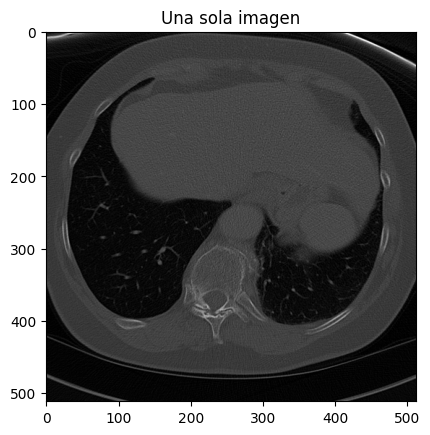

In [30]:
#Visualicemos la imagen
#Extraemos los pixeles de la imagen
im = ds.pixel_array

plt.imshow(im, cmap='gray')
plt.axis()
plt.title('Una sola imagen')
plt.show()

In [ ]:
nombre_archivo_png = '/content/drive/MyDrive/Imagenes_2024/imagen_dicom_en_png.png'

In [ ]:
data = ds.pixel_array.astype(float)
assert data.shape[0] > 0
"""  Rescaling grey scale between 0-255 """
norm_image = (np.maximum(data, 0) / data.max()) * 255.0
current_original_image = np.uint8(norm_image)
nom_archivo = nombre_archivo_png
plt.imsave(nom_archivo, current_original_image, cmap='gray')


In [ ]:
# Abrir la imagen PNG
image = Image.open(nombre_archivo_png )

# Mostrar la imagen
plt.imshow(image)
plt.axis()
plt.show()


#ImageIO


In [ ]:
!pip install imageio

In [ ]:
import ipywidgets as widgets
%matplotlib inline
import imageio

##Importo el archivo DICOM

In [ ]:
im = imageio.imread('/content/drive/MyDrive/Imagenes_2024/000000.dcm')
im

##Ver toda la metadata

In [ ]:
#DICOM Metadata
im.meta

In [ ]:
im.meta.keys()

##Acceder a valores

In [ ]:
im.meta['Modality']

##¿Cómo vemos la imagen?

In [ ]:
#Show the image with gray color-map
plt.imshow(im, cmap='gray')
#Don't show tha axes
plt.axis('off')
#Add a title to the plot
plt.title('Axial Slice')
plt.show()

¿Qué pasa cuando estamos analizando una tomografía computada o una resonancia magnetica?

Vamos a tener multiples imagenes porque capturamos multiples cortes.

En el caso de Pydicom para ingresar a las mismas debemos utilizar un bucle for e ir abriendo estos archivos uno por vez.

Sin embargo ImageIO ofrece una función que permite la lectura de todos los archivos presentes en una carpeta

In [ ]:
#Leemos los 99 cortes de la tomografía
vol = imageio.volread('/content/drive/MyDrive/Imagenes_2024/Imagenes_CT', 'DICOM')

In [ ]:
#Ingresamos a una slice en particular
vol[0,:,:]

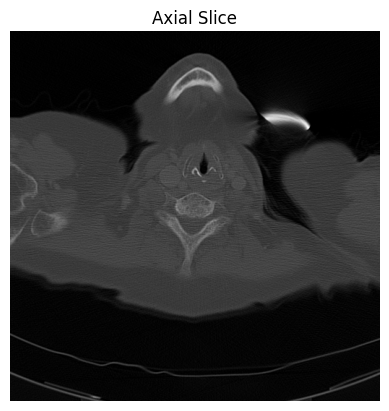

In [ ]:
#Visualizamos un imagen en particular
#Show the first slice.
plt.imshow(vol[0,:,:], cmap='gray')
#Don't show the axis
plt.axis('off')
#Add a title
plt.title('Axial Slice')
plt.show()

In [ ]:
#Podemos ver la metadata de todo el volumen
vol.meta

##Construyendo un pequeño visor de imagenes

In [ ]:
#Función shape nos va a dice cuantos cortes tenemos en cada dirección
# (Axial, Coronal, y Sagittal, respectivamente)
n0, n1, n2 = vol.shape
# Print the ouput
print("Number of Slices:\n\t", "Axial=", n0, "Slices\n\t",
                               "Coronal=", n1, "Slices\n\t",
                               "Sagittal=", n2, "Slices")


In [ ]:
# Leemos la metadata 'sampling' que es una variable de ImageIO
# Esta variable combina los atributos SliceThickness y PixelSpacing, por los que nos devuelve
# (Axial, Coronal y Sagittal, respectivamente)
d0, d1, d2 = vol.meta['sampling'] # in mm
# Print the output
print("Sampling:\n\t", "Axial=", d0, "mm\n\t",
                               "Coronal=", d1, "mm\n\t",
                               "Sagittal=", d2, "mm")

In [ ]:
#Lograr saber cuales son las medidas de cada dirección de los voxeles
#Plano axial
axial_asp = d1/d2
#Plano sagital
sagittal_asp = d0/d1
#Plano coronal
coronal_asp = d0/d2
# Imprimir la salida
print ( "Pixel Aspect Ratio:\n\t" , "Axial=" , axial_asp, "\n\t" ,
                               "Coronal=" , coronal_asp, "\n\t" ,
                               "Sagittal=" , sagittal_asp)

In [ ]:

@widgets.interact(axial_slice=(0,n0-1), coronal_slice=(0,n1-1),\
                  sagittal_slice=(0,n2-1))

def slicer(axial_slice, coronal_slice, sagittal_slice=100):
  plt.close('all')
  fig, ax = plt.subplots(1, 3, figsize=(12, 12))

  # Show the specfied slice on the axial plane with 'gray' color-map
  # and axial aspect ratio.
  ax[0].imshow(vol[axial_slice,:,:], cmap='gray', aspect= axial_asp)
  ax[0].axis('off')
  ax[0].set_title('Axial')

  # Show the specified slice on the coronal plane with 'gray' color-map
  # and coronal aspect ratio.
  ax[1].imshow(vol[:,coronal_slice,:],cmap='gray', aspect= coronal_asp)
  ax[1].axis('off')
  ax[1].set_title('Coronal')

  # Show the specified slice on the sagittal plane with 'gray' color-map
  # and sagittal aspect ratio.
  ax[2].imshow(vol[:,:,sagittal_slice], cmap='gray', aspect= sagittal_asp)
  ax[2].axis('off')
  ax[2].set_title('Sagittal')

  plt.show()


##Pensar como seria con pydicom


Pista, tomamos un ciclo for para leer todas los archivos de la carpeta

Tomamos sus pixel arrays bidimensionales y los agrupamos en un array de 3 dimensiones...

Los calculos a seguir son muy similares...

#Referencias
* https://dricloud.com/formato-dicom/
* https://towardsdatascience.com/introducing-pydicom-its-classes-methods-and-attributes-518c1d71162
* https://towardsdatascience.com/dealing-with-dicom-using-imageio-python-package-117f1212ab82
* https://pydicom.github.io/pydicom/stable/old/getting_started.html
* https://www.kaggle.com/datasets/dmisky/dlwptvolumetricdicomlung?select=000004.dcm
* https://www.kaggle.com/competitions/osic-pulmonary-fibrosis-progression/data
* https://arxiv.org/abs/2203.10612
* https://arxiv.org/abs/2106.12930

